## Question 1

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import types
from pyspark.sql import functions as F

In [2]:
pyspark.__version__

'3.5.5'

In [3]:
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("homework5") \
    .getOrCreate()

25/03/06 12:41:49 WARN Utils: Your hostname, LAPTOP-F5VFQF4J resolves to a loopback address: 127.0.1.1; using 172.26.218.55 instead (on interface eth0)
25/03/06 12:41:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/06 12:41:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark.version

'3.5.5'

## Question 2

In [5]:
df = spark.read \
    .option("header", "true") \
    .parquet('../data/tmp/yellow_tripdata_2024-10.parquet')

In [6]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [7]:
df.schema

StructType([StructField('VendorID', IntegerType(), True), StructField('tpep_pickup_datetime', TimestampNTZType(), True), StructField('tpep_dropoff_datetime', TimestampNTZType(), True), StructField('passenger_count', LongType(), True), StructField('trip_distance', DoubleType(), True), StructField('RatecodeID', LongType(), True), StructField('store_and_fwd_flag', StringType(), True), StructField('PULocationID', IntegerType(), True), StructField('DOLocationID', IntegerType(), True), StructField('payment_type', LongType(), True), StructField('fare_amount', DoubleType(), True), StructField('extra', DoubleType(), True), StructField('mta_tax', DoubleType(), True), StructField('tip_amount', DoubleType(), True), StructField('tolls_amount', DoubleType(), True), StructField('improvement_surcharge', DoubleType(), True), StructField('total_amount', DoubleType(), True), StructField('congestion_surcharge', DoubleType(), True), StructField('Airport_fee', DoubleType(), True)])

In [8]:
schema_tirp_data = types.StructType([
    types.StructField('VendorID', types.IntegerType(), True),
    types.StructField('tpep_pickup_datetime', types.TimestampType(), True),
    types.StructField('tpep_dropoff_datetime', types.TimestampType(), True),
    types.StructField('passenger_count', types.LongType(), True),
    types.StructField('trip_distance', types.DoubleType(), True),
    types.StructField('RatecodeID', types.LongType(), True),
    types.StructField('store_and_fwd_flag', types.StringType(), True),
    types.StructField('PULocationID', types.IntegerType(), True),
    types.StructField('DOLocationID', types.IntegerType(), True),
    types.StructField('payment_type', types.LongType(), True),
    types.StructField('fare_amount', types.DoubleType(), True),
    types.StructField('extra', types.DoubleType(), True),
    types.StructField('mta_tax', types.DoubleType(), True),
    types.StructField('tip_amount', types.DoubleType(), True),
    types.StructField('tolls_amount', types.DoubleType(), True),
    types.StructField('improvement_surcharge', types.DoubleType(), True),
    types.StructField('total_amount', types.DoubleType(), True),
    types.StructField('congestion_surcharge', types.DoubleType(), True),
    types.StructField('Airport_fee', types.DoubleType(), True)
])

In [9]:
df = spark.read \
    .option("header", "true") \
    .schema(schema_tirp_data) \
    .parquet('../data/tmp/yellow_tripdata_2024-10.parquet')

In [10]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [11]:
df = df.repartition(4)

In [12]:
df.write.parquet('../data/tripdata/yellow/2024/10')

In [13]:
!ls -lh ../data/tripdata/yellow/2024/10

total 97M
-rw-r--r-- 1 joviedo joviedo   0 Mar  6 12:42 _SUCCESS
-rw-r--r-- 1 joviedo joviedo 25M Mar  6 12:42 part-00000-a3753a80-7c3d-4006-bcef-a3ced1b842c3-c000.snappy.parquet
-rw-r--r-- 1 joviedo joviedo 25M Mar  6 12:42 part-00001-a3753a80-7c3d-4006-bcef-a3ced1b842c3-c000.snappy.parquet
-rw-r--r-- 1 joviedo joviedo 25M Mar  6 12:42 part-00002-a3753a80-7c3d-4006-bcef-a3ced1b842c3-c000.snappy.parquet
-rw-r--r-- 1 joviedo joviedo 25M Mar  6 12:42 part-00003-a3753a80-7c3d-4006-bcef-a3ced1b842c3-c000.snappy.parquet


## Question 3

In [14]:
df = spark.read \
    .option("header", "true") \
    .schema(schema_tirp_data) \
    .parquet('../data/tmp/yellow_tripdata_2024-10.parquet')

In [15]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [16]:
df.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [43]:
df\
.select('tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'total_amount')\
.show(10)

+--------------------+---------------------+---------------+-------------+------------+
|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|total_amount|
+--------------------+---------------------+---------------+-------------+------------+
| 2024-09-30 20:30:44|  2024-09-30 20:48:26|              1|          3.0|        24.9|
| 2024-09-30 20:12:20|  2024-09-30 20:25:25|              1|          2.2|        23.0|
| 2024-09-30 20:04:46|  2024-09-30 20:13:52|              1|          2.7|        22.2|
| 2024-09-30 20:12:10|  2024-09-30 20:23:01|              1|          3.1|        21.2|
| 2024-09-30 20:30:22|  2024-09-30 20:30:39|              1|          0.0|         8.0|
| 2024-09-30 20:31:20|  2024-09-30 20:36:00|              2|         0.97|       14.64|
| 2024-09-30 20:42:57|  2024-09-30 20:49:01|              1|          1.3|       15.45|
| 2024-09-30 20:59:55|  2024-09-30 21:02:24|              1|          0.5|        12.1|
| 2024-09-30 20:00:47|  2024-09-

In [18]:
df_train_15_10_2024 = df.filter((F.year(df.tpep_pickup_datetime) == 2024) & 
                                (F.month(df.tpep_pickup_datetime) == 10) & 
                                (F.dayofmonth(df.tpep_pickup_datetime) == 15)
                               )

In [19]:
df_train_15_10_2024\
.select('tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'total_amount')\
.show(10)

[Stage 7:============================================>              (3 + 1) / 4]

+--------------------+---------------------+---------------+-------------+------------+
|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|total_amount|
+--------------------+---------------------+---------------+-------------+------------+
| 2024-10-15 04:31:31|  2024-10-15 04:40:59|              1|         2.24|       20.12|
| 2024-10-15 04:52:44|  2024-10-15 05:04:09|              1|         1.32|       19.32|
| 2024-10-15 09:54:48|  2024-10-15 10:49:24|              1|        14.61|        92.5|
| 2024-10-15 11:58:31|  2024-10-15 12:56:27|              1|        18.82|       80.19|
| 2024-10-15 12:25:10|  2024-10-15 13:10:52|              1|         8.93|       81.95|
| 2024-10-15 13:20:05|  2024-10-15 13:36:27|              1|         2.78|        23.0|
| 2024-10-15 13:17:04|  2024-10-15 13:28:13|              1|         1.36|       16.32|
| 2024-10-15 13:38:27|  2024-10-15 13:42:05|              1|         0.52|       11.27|
| 2024-10-15 13:59:33|  2024-10-

In [20]:
df_train_15_10_2024.count()

128811

## Question 4

In [21]:
df = df \
.withColumn('duration_in_hours', (F.col('tpep_dropoff_datetime').cast('long') - F.col('tpep_pickup_datetime').cast('long')) / 3600)

In [22]:
df.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'duration_in_hours']

In [23]:
df.createOrReplaceTempView('trips_yellow_data')

In [24]:
spark.sql("""
SELECT 
    ROUND(MAX(duration_in_hours),2) AS max_duration 
FROM trips_yellow_data
""").show()

+------------+
|max_duration|
+------------+
|      162.62|
+------------+



## Question 5

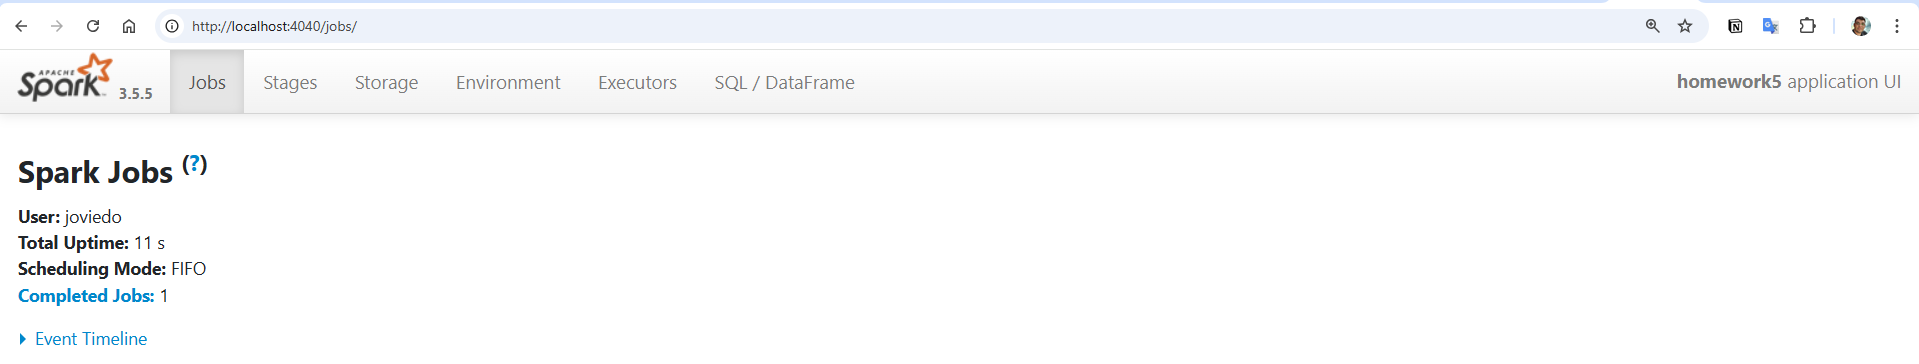

## Question 6

In [26]:
df_zone = spark.read \
    .option("header", "true") \
    .csv('../data/tmp/taxi_zone_lookup.csv')

In [29]:
df_zone.show(10)

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 10 rows



In [27]:
df_zone.printSchema()

root
 |-- LocationID: string (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



In [30]:
df_zone.schema

StructType([StructField('LocationID', StringType(), True), StructField('Borough', StringType(), True), StructField('Zone', StringType(), True), StructField('service_zone', StringType(), True)])

In [31]:
schema_tirp_zone = types.StructType([
types.StructField('LocationID', types.IntegerType(), True),
types.StructField('Borough', types.StringType(), True),
types.StructField('Zone', types.StringType(), True),
types.StructField('service_zone', types.StringType(), True)
])

In [32]:
df_zone = spark.read \
    .option("header", "true") \
    .schema(schema_tirp_zone) \
    .csv('../data/tmp/taxi_zone_lookup.csv')

In [33]:
df_zone.printSchema()

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



In [34]:
df_zone.createOrReplaceTempView('trips_zone')

In [42]:
spark.sql("""
SELECT 
    yellow.PULocationID AS location_id_pickup,
    zone.Zone AS description_zone,
    COUNT(*) AS count_location_id_pickup
FROM trips_yellow_data AS yellow
INNER JOIN trips_zone AS zone ON yellow.PULocationID == zone.LocationID
GROUP BY yellow.PULocationID, zone.Zone
ORDER BY count_location_id_pickup ASC
LIMIT 10
""").show(truncate=False)

[Stage 38:=============================>                            (4 + 4) / 8]

+------------------+---------------------------------------------+------------------------+
|location_id_pickup|description_zone                             |count_location_id_pickup|
+------------------+---------------------------------------------+------------------------+
|105               |Governor's Island/Ellis Island/Liberty Island|1                       |
|5                 |Arden Heights                                |2                       |
|199               |Rikers Island                                |2                       |
|2                 |Jamaica Bay                                  |3                       |
|111               |Green-Wood Cemetery                          |3                       |
|245               |West Brighton                                |4                       |
|84                |Eltingville/Annadale/Prince's Bay            |4                       |
|204               |Rossville/Woodrow                            |4             